# Dog, cat image classification problem set

* 이번 학습에서는 처음부터 끝까지 Dog, cat dataset에 대한 분류 model을 구현합니다

### [CUDA](http://pytorch.org/docs/stable/cuda.html)

* cuda를 이용하겠습니다


In [ ]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
#train_on_gpu = False

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


---
## Load the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

* 아미지를 다운로드 받습니다
* 폴더별로
 - test
 - train
 - validation

 data를 받습니다. 


In [ ]:
!pip install googledrivedownloader

In [ ]:
from os.path import exists
from google_drive_downloader import GoogleDriveDownloader as gdd
import tarfile

if exists("./Cat_Dog_data.tgz"):
    !rm -rf ./Cat_Dog_data.tgz

gdd.download_file_from_google_drive(file_id='1WpY0qpe7yF5C5M52z1BMIzYVpDYiU3OV',
                                    dest_path = './Cat_Dog_data.tgz')

tf = tarfile.open("Cat_Dog_data.tgz")
tf.extractall()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Problem 1 [20 points]: 

* Training, validation, test를 위한 dataloader, transform을 적절하게 준비해주세요
* 아래 data 준비하는 코딩을 수행하고, 아래 markdown에 준비한 과정 및 이유를 구체적으로 설명하세요
* 아래 답안 작성에 data의 구조에 대해서 설명하세요
* 코드에는 주석을 달아주세요.

In [ ]:
# Coding
from torchvision import datasets
import torchvision.transforms as transforms
#from torch.utils.data.sampler import SubsetRandomSampler


batch_size = 20 # batch 사이즈를 20으로 조정합니다.

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
# Transform 을 정의합니다. RGB 3개의 channel로 정규화하며 크기를 맞춰주기 위해 Resize 해줍니다.

train_data = datasets.ImageFolder(root='train', transform=transform) 
valid_data = datasets.ImageFolder(root='validation', transform=transform)
test_data = datasets.ImageFolder(root='test', transform=transform)
# train 폴더에 있는 데이터들을 불러 transform을 적용하여 데이터셋을 정의합니다.
# validation 폴더에 있는 데이터들을 불러 transform을 적용하여 데이터셋을 정의합니다.
# 마찬가지로 test 폴더에 있는 데이터들을 불러 transform을 적용하여 데이터셋을 정의합니다.


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
    shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
# train_loader, valid_loader, test_loader 는 각각 train_data, valid_data, test_data 를 적용합니다.
# batch_size는 20으로 설정, shuffle(무작위로 섞음) 은 True로 설정합니다.

classes = ['cat', 'dog'] # class 는 개, 고양이 두개입니다.

**분석 및 설명:** 먼저 transform을 준비합니다. RGB 세개의 채널이므로 각각 0.5로 정규화(Normalize) 하고 Resize를 통해 크기를 조절합니다. 정규화를 하는 이유는 설계한 네트워크가 최적화가 잘 되도록 데이터를 변형하기 위한 것이며 평균이 0, 표준편차가 1이 되게끔 변형하는 경우가 대부분 잘 동작합니다. Resize 를 통해 크기를 조절하지 않을 경우 모두 크기가 달라 오류가 발생하게 되기 때문에 맞춰 주어야 합니다. 다음으로는 준비된 데이터 셋을 datasets.ImageFolder 를 사용해 train, validation, test 각 폴더에 있는 데이터들을 transform을 적용하여 정의합니다. 각각의 dataloader를 준비하기 위해 각각의 데이터들이 들어있는 폴더를 torch.utils.data.DataLoader를 이용하여 적용하고 정해놓은 batch_size(20) 을 줍니다. 또한 무작위로 섞기 위해 Shuffle 옵션을 True로 설정합니다.
마지막으로 분류할 종류는 개, 고양이 2가지 이므로 class 는 'cat' , 'dog' 으로 정의해줍니다.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img * 0.5 + 0.5  # unnormalize (채널별로 다를 경우 채널별로 계산)
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

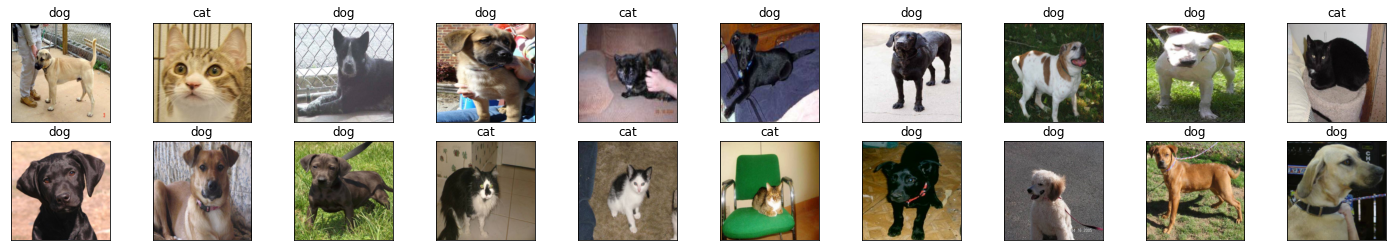

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

## Problem 2 [20 point]: Define the Network Architecture

* 구현하고자하는 network을 작성해주세요
* 아래 구현 방법과 이유를 구체적으로 설명하세요
* 코드에는 주석을 달아주세요. 
* 아래 모델을 구체적으로 설명하고, 설정 이유를 작성해주세요
* 본 과정에서는 직접 network을 구현하고, transfer learning은 활용하지 않도록 하겠습니다.

In [ ]:
# 코드 작성

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        #layer들을 정의하는 함수
        super(Net, self).__init__()
        

        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        # input 채널 3, 16개의 필터사용, 3x3 커널 padding 1 은 항상 같은 차원을 유지합니다.
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        # 위에서 16개의 채널을 사용 했으므로 input size 유지, 16개 채널 들어감 32개 채널로 변환합니다.
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        # 위에서 32개의 채널을 사용 했으므로 input size 유지, 32개 채널 들어감 64개 채널로 변환합니다.
        self.conv4 = nn.Conv2d(64,128,3,padding=1)
        # 마찬가지로 64개의 채널 들어가고 128 채널로 변환 필터크기 똑같이 유지합니다.
        # 14 * 14 * 128 

        self.pool = nn.MaxPool2d(2, 2)
        # overfitting(과적합) 방지를 위해 max pooling(사이즈를 반으로 줄입니다.)
        self.fc1 = nn.Linear(128 * 14 * 14, 500) 
        # linear input 은 128 * 14 * 14 , 500개의 output으로 바꿉니다.
        self.fc2 = nn.Linear(500, 250)
        # linear input 은 500, output 은 250
        self.fc3 = nn.Linear(250, 2)
        # input은 250, 최종 output이 2개이므로 바꿉니다.
        self.dropout = nn.Dropout(0.25)
        # overfitting(과적합)을 막기 위해 dropout을 0.25로 설정합니다.

    def forward(self, x):
        #layer들을 max pooling 합니다. 사이즈가 반으로 줄어듭니다.
        x = self.pool(F.relu(self.conv1(x))) # relu를 하고 max pooling을 합니다.
        x = self.pool(F.relu(self.conv2(x))) # relu를 하고 max pooling을 합니다.
        x = self.pool(F.relu(self.conv3(x))) # relu를 하고 max pooling을 합니다. 
        x = self.pool(F.relu(self.conv4(x))) # relu를 하고 max pooling을 합니다. 14 * 14 * 128 이 되어있을 것으로 예상됩니다.
        x = self.dropout(x)
        # 정확도를 높여보기 위해 convoltion layer에도 사용해봅니다.

        x = x.view(-1, 128 * 14 * 14)
        # input image를 맞춥니다. fc layer에 적용하기 위해 Flatten -1 차원으로 변환합니다.

        x = F.relu(self.fc1(x)) 
        # 첫 번째 hidden layer에 relu를 함

        x = self.dropout(x)
        # dropout layer 적용
        x = F.relu(self.fc2(x)) 
        # 두 번째 hidden layer에 relu를 함
        x = F.log_softmax(self.fc3(x),dim=1)
        # log_softmax 를 사용하고 fc layer3 를 사용하며 criterion을 NLLLoss로 사용합니다.
        
        return x

model = Net() # model이라는 인스턴스 생성
print(model) # model 출력

if train_on_gpu:
    model.cuda()
# gpu 사용 가능시 cuda 사용

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=2, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


**분석 및 설명:** CNN(Convolutional Neural Network) 을 사용합니다. CNN 은 이미지의 공간 정보를 유지한 상태로 학습이 가능한 모델입니다. 모델 설정 이유는 사진 데이터를 평면화 시키는 과정에서는 공간 정보가 손실될 수 밖에 없는데 이미지 공간 정보 유실로 인한 정보 부족으로 인공 신경망이 특징을 추출 및 학습이 비효율적이고 정확도를 높이는데 한계가 발생합니다. 따라서 이미지 공간정보를 유지한 상태로 학습을 시키기 위해 CNN을 사용했습니다.

구현방법은 먼저 convolution layer 를 정의합니다. 보통 2~3개가 최소이며 처음 3개를 썼을 때 overfitting이 나오게 되어 4개를 사용했습니다. input channel 은 3이며 16, 32, 64, 128 로 점점 늘어나며, max pooling을 사이즈는 224*224 에서 반씩 줄어들어 최종으로는 14 * 14 * 128 이 됩니다. 
fc layer는 1 : 14 * 14 * 128 - > 500 으로
2 : 500 - > 250 으로, 3 : 250 -> 2 (최종출력 output은 2종류이기 때문)으로 설정하였습니다.
forward 함수에서는 layer들을 max pooling 합니다. 사이즈가 반으로 줄어듭니다. convolution layer들을 relu 하고 max pooling 을 누적해서 적용하면 최종적으로는 14 * 14 * 128이 되어있습니다. view를 이용해서 Flatten -1 차원으로 변환해주고 fc1,2 layer에 relu 해줍니다. 마지막으로 log_softmax 를 사용하고 fc layer3 를 사용하며 criterion을 NLLLoss로 사용합니다. 이후 model 이라는 인스턴스를 생성해줍니다.

## Problem 3 [5 point]: Specify Loss Function

* Loss 함수와 optimizer를 구현하세요
* 선정 이유를 설명하세요


In [ ]:
# 코드

import torch.optim as optim


criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

 **설명:** NLLLoss 를 선정한 이유는 Classification, 즉 분류에 유용하기 때문이다.
 SGD(Stochastic Gradient Descent) 선정 이유는 mini batch 사이즈만큼 돌려 최적의 값을 찾기 때문에 속도가 빨라서 사용했습니다.


## Problem 4 [30 point]: Train the Network

* training loss와 validation loss를 기록하며 training을 구현하세요
* 만약 validation loss가 최소화된 모델을 저장하세요
* 코드에는 모두 주석을 포함해주세요
* training과정을 설명하고, training 결과를 분석해주세요

In [ ]:
# 코드 작성

n_epochs = 50
# 전체 데이터를 50번 학습시키기 위해 epochs 를 설정합니다.

valid_loss_min = np.Inf 
# 매 epochs 마다 validation_loss 를 비교하기 위한 값입니다.
# 초기 최소 값은 np.Inf 로 해줍니다.

for epoch in range(1, n_epochs+1): # epochs 만큼 반복합니다.

    train_loss = 0.0
    valid_loss = 0.0
    # train_loss, valid_loss를 epochs 마다 계산합니다.
    
    model.train() # train model 을 훈련합니다.
    for data, target in train_loader: 
        if train_on_gpu: # CUDA 사용 가능 여부를 확인하고 gpu 사용을 위해 변환하기 위한 반복문입니다. 
            data, target = data.cuda(), target.cuda() # data, target을 cuda 를 사용합니다.
        
        optimizer.zero_grad()
        # gredient descent 초기화 합니다.

        output = model(data)
        # model 에 data(이미지)를 주어 출력(output)을 계산합니다.

        loss = criterion(output, target)
        # output과 target을 이용해 batch loss 를 계산합니다.

        loss.backward()
        # 모델 파라미터로 손실의 기울기 계산

        optimizer.step()
        # 단일 최적화 단계를 수행합니다.
        
        train_loss += loss.item()*data.size(0)
        # train_loss 를 위에서 훈련 loss를 계산하고 업데이트 해줍니다.

    model.eval() # model.eval 을 사용하여 validation 을 업데이트 합니다.

    for data, target in valid_loader:
        if train_on_gpu: # CUDA 사용 가능 여부를 확인하고 gpu 사용을 위해 변환하기 위한 반복문입니다.
            data, target = data.cuda(), target.cuda()

        output = model(data)
        # model 에 data(이미지)를 주어 출력(output)을 계산합니다.

        loss = criterion(output, target)
        # output과 target을 이용해 batch loss 를 계산합니다.

        valid_loss += loss.item()*data.size(0)
        # valid_loss 를 위에서 훈련 loss를 계산하고 업데이트 해줍니다.
        # data.size(batch 사이즈)를 곱하는 이유는 loss.item 은 batch의 batch사이즈로 평균을 냅니다.
        # 여기서 datasize를 곱해줘야합니다.
        # 나중에 전체 데이터 사이즈로 나눠야 평균을 낼 수 있습니다.
    

    # 평균 손신을 계산합니다.
    train_loss = train_loss/len(train_loader.sampler) # .sampler를 해야 2만개가 나옴
    valid_loss = valid_loss/len(valid_loader.sampler) # 마찬가지로 4천개 나옴
        
    # training, validation의 평균 손실을 출력합니다.
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    

    # validation loss가 감소할 때 마다 내용을 저장하는 조건문입니다.
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.315413 	Validation Loss: 0.401286
Validation loss decreased (inf --> 0.401286).  Saving model ...
Epoch: 2 	Training Loss: 0.276982 	Validation Loss: 0.430545
Epoch: 3 	Training Loss: 0.234350 	Validation Loss: 0.446835
Epoch: 4 	Training Loss: 0.188551 	Validation Loss: 0.461424
Epoch: 5 	Training Loss: 0.145059 	Validation Loss: 0.521233
Epoch: 6 	Training Loss: 0.106565 	Validation Loss: 0.506806
Epoch: 7 	Training Loss: 0.089774 	Validation Loss: 0.526690
Epoch: 8 	Training Loss: 0.066859 	Validation Loss: 0.648354
Epoch: 9 	Training Loss: 0.051965 	Validation Loss: 0.651424
Epoch: 10 	Training Loss: 0.050235 	Validation Loss: 0.857105
Epoch: 11 	Training Loss: 0.043636 	Validation Loss: 0.651741
Epoch: 12 	Training Loss: 0.038219 	Validation Loss: 0.692481
Epoch: 13 	Training Loss: 0.026575 	Validation Loss: 0.775887
Epoch: 14 	Training Loss: 0.026430 	Validation Loss: 0.739038
Epoch: 15 	Training Loss: 0.023540 	Validation Loss: 0.761177
Epoch: 16 	Trai

**분석 및 설명:** epoch 30, 40, 50번 순으로 진행해 보았습니다. 매번 실행할 때 마다 loss 가 다르게 나오지만 보통 epoch의 절반 정도 수행할 때 까지는 overfitting(과적합)이 발생하지 않지만 그 기준을 넘어가게 되면 overfitting 이 발생하게 되는 것을 확인했습니다. overfitting 을 확인하게 된 것은 training loss 는 계속해서 줄어들지만 validation loss 는 중간부터 크게 증가하기 때문에 과적합을 확인할 수 있었습니다. 
training 과정은 model 에 train, validation data 를 넣고 output(출력)을 계산합니다. 그리고 나서 계산된 output으로 각 loss를 계산하고 기울기를 업데이트 합니다. 그 후 training loss, validation loss 가 같이 줄어 나가면 좋은 결과지만 validation loss가 일정 순간부터 줄어들지 않고 증가하는 것으로 보아 overfitting 이 발생한 것 같습니다.

## Problem 5 [5 point] Validation Loss가 최소화된 Model가져오기

* 최소 validation loss를 갖는 model을 불러옵니다

In [ ]:
# 코드 작성
model.load_state_dict(torch.load('model_cifar.pt'))
# 제일 좋았던 모델로 로딩

<All keys matched successfully>

---
## Problem 6 [20point]: Test the Trained Network

* Test set을 활용하여 성능 검증
* Accuracy (분류 성공률)와 test loss를 출력하세요
* 코드에는 주석을 달아주세요
* 아래 test 결과에 대해서 간단하게 설명/분석 해주세요

In [ ]:
# 코드 작성

test_loss = 0.0 # test_loss 를 초기화합니다.
class_correct = list(0. for i in range(2)) # Cat, Dog 두개의 클래스를 어느정도 맞출 수 있는지 확인하기 위해 초기화합니다.
class_total = list(0. for i in range(2)) # Cat, Dog 두개의 클래스가 총 몇장의 data(이미지)를 보유하고 있는지 확인하기 위해 초기화 합니다.

model.eval() # model.eval 을 사용하여 validation 을 업데이트 합니다.

for data, target in test_loader: # test_loader 크기만큼 반복합니다.

    # CUDA 사용 가능 여부를 확인하고 gpu 사용을 위해 변환하기 위한 반복문입니다.
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()

    output = model(data)
    # model 에 data(이미지)를 주어 출력(output)을 계산합니다.

    loss = criterion(output, target)
    # output과 target을 이용해 batch loss 를 계산합니다.

    test_loss += loss.item()*data.size(0)
    # train_loss 를 위에서 훈련 loss를 계산하고 업데이트 해줍니다.

    _, pred = torch.max(output, 1)    
    # 출력 확률을 예측 된 클래스로 변환합니다.
    
    correct_tensor = pred.eq(target.data.view_as(pred))
    # 예측을 실제 라벨과 비교합니다.

    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # train 한 gpu가 아니면 앞에 있는 코드 수행, gpu면 else문 수행합니다. (cpu로 옮긴후 numpy)

    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
    # 각 객체 클래스에 대한 테스트 정확도를 계산합니다.
    # 총 개수, 정확도(correct)를 저장합니다.


# test_loss 의 평균을 계산합니다. 
test_loss = test_loss/len(test_loader.dataset) # 누적된 test_loss 를 test_loader의 크기만큼 나눠줍니다.
print('Test Loss: {:.6f}\n'.format(test_loss)) # test loss 를 출력합니다.

# Cat, Dog 2개의 클래스 마다 몇 개의 데이터중 몇개를 맞췄는지 출력합니다.
for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

# Cat, Dog 두 개의 클래스의 평균 정확도를 출력합니다.
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.442220

Test Accuracy of   cat: 80% (1006/1250)
Test Accuracy of   dog: 78% (984/1250)

Test Accuracy (Overall): 79% (1990/2500)


**분석 및 설명:** 정확도 확인 결과 생각보다 높지 않은 값이 나왔습니다. test loss 또한 높게 나왔으며 결과를 보아 Network 및 model 구현부분에서 추가 작업이 필요한 것 같습니다.


---
## Problem 7: 전체적인 총평

* Data준비, Training과 validation 과정에서 성능 개선을 위해서 수행한 과정과 성공/실패 이유를 분석해주세요


**설명:** 처음에는 convolution layer을 3개로 진행하였으며, transform 에서 해상도 즉, resize를 128로 주었습니다. 그렇게 진행하였더니 overfitting(과적합) 이 지금보다 더 심했습니다. 해상도가 낮고 convolution layer의 개수가 적다보니 분류에 있어 더욱 더 어려움을 겪은 것 같습니다. convolution layer를 4개로 늘리고 진행하였더니 조금 더 나은 성과를 발휘했으나 여전히 마찬가지로 overfitting 이 발생하였고 정확도 또한 확연한 차이를 보이지 못했습니다. 더 나은 성능 개선을 위해서는 convolution layer의 개수를 늘려보거나 해상도를 높여 보는 방법을 사용해 보아야 할 것 같습니다.